<a href="https://colab.research.google.com/github/Jieunlee-svg/dataanalysis_/blob/main/%EC%84%A4%EB%AC%B8%EC%A1%B0%EC%82%AC_%EA%B2%B0%EA%B3%BC_%EB%B6%84%EC%84%9D_%EA%B1%B4%EA%B0%95_%EC%A0%95%EB%B3%B4_%EA%B3%B5%EC%9C%A0%EC%97%90_%EB%8C%80%ED%95%9C_%EC%84%A0%ED%98%B8%EB%8F%84_%EA%B5%90%EC%B0%A8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 업로드
from google.colab import files
uploaded = files.upload()

# 파일명 추출 및 불러오기
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# 공백 제거 (모든 문자열 컬럼에 대해)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

Saving poll_answer2.xlsx to poll_answer2 (5).xlsx


/tmp/ipython-input-1-1339928321.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [3]:
df.head()

,번호,AGE_2,Q1(TEXT),Q2(TEXT),Q3_1(TEXT),Q3_2(TEXT),Q3_3(TEXT),Q3_4(TEXT),Q3_5(TEXT),Q4_1(TEXT),...,Q17_1(TEXT),Q17_2(TEXT),Q17_3(TEXT),Q17_4(TEXT),Q17_5(TEXT),Q17_6(TEXT),Q17_7(TEXT),Q17_8(TEXT),Q18(TEXT),Q19(TEXT)
0,1,40대,내 건강 정보를 가족과 나누고 싶어요. (공유하는 사람),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,40대,NaN,NaN,NaN,NaN,상황에 따라 다르다.,지금은 무엇보다 병원들의 정상화가 제일 시급한 것 같다
1,2,50대,가족의 건강 정보를 알고 싶어요. (공유받는 사람),가끔 있다.,스스로 건강 관리를 하기 어려울 때,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20대,가족의 건강 정보를 알고 싶어요. (공유받는 사람),거의 없다.,스스로 건강 관리를 하기 어려울 때,NaN,NaN,NaN,NaN,부모,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,30대,가족의 건강 정보를 알고 싶어요. (공유받는 사람),가끔 있다.,스스로 건강 관리를 하기 어려울 때,NaN,NaN,NaN,NaN,부모,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,20대,가족의 건강 정보를 알고 싶어요. (공유받는 사람),자주 있다.,NaN,멀리 떨어져 살아 자주 확인하기 어려울 때,NaN,NaN,NaN,부모,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 나눔고딕 폰트 설치
!apt-get -qq install fonts-nanum

# 런타임에 폰트 설정 적용
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')  # 나눔고딕으로 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 현재 설정된 폰트 확인
import matplotlib
print(matplotlib.rcParams['font.family'])

['NanumGothic']


In [5]:
# Q2 응답 순서 설정
q2_order = ['자주 있다.', '가끔 있다.', '거의 없다.', '전혀 없다.']
df['Q2(TEXT)'] = pd.Categorical(df['Q2(TEXT)'], categories=q2_order, ordered=True)

# 유효 응답 필터링, 결측치 제거
df_q2 = df[df['Q2(TEXT)'].notna()]

In [6]:
# 빈도 교차표
ct_q2 = pd.crosstab(index=df_q2['Q2(TEXT)'], columns=df_q2['AGE_2'], margins=True, margins_name='Total')
ct_q2 = ct_q2.reindex(q2_order + ['Total'])
print("✅ 빈도 교차표")
display(ct_q2)

# 비율 교차표
ct_q2_pct = pd.crosstab(index=df_q2['Q2(TEXT)'], columns=df_q2['AGE_2'], normalize='columns') * 100
ct_q2_pct = ct_q2_pct.reindex(q2_order)
print("✅ 비율 교차표")
display(ct_q2_pct.round(1))

✅ 빈도 교차표


AGE_2,20대,30대,40대,50대,60대,Total
Q2(TEXT),,,,,,
자주 있다.,10,14,12,17,14,67
가끔 있다.,33,40,44,48,38,203
거의 없다.,6,9,6,0,3,24
전혀 없다.,5,7,2,0,0,14
Total,54,70,64,65,55,308


✅ 비율 교차표


AGE_2,20대,30대,40대,50대,60대
Q2(TEXT),,,,,
자주 있다.,18.5,20.0,18.8,26.2,25.5
가끔 있다.,61.1,57.1,68.8,73.8,69.1
거의 없다.,11.1,12.9,9.4,0.0,5.5
전혀 없다.,9.3,10.0,3.1,0.0,0.0


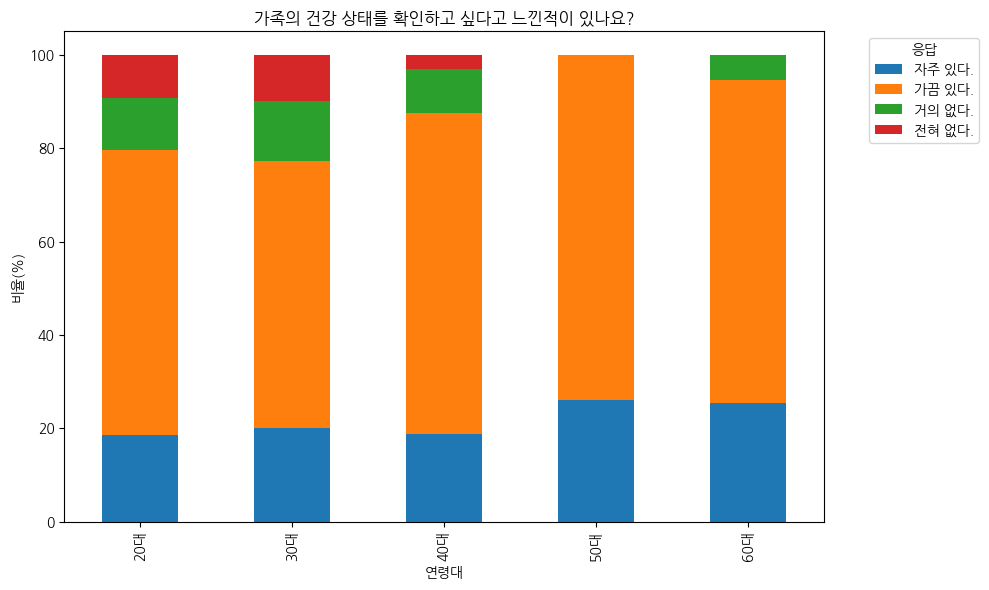

In [7]:
ct_q2_pct.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('가족의 건강 상태를 확인하고 싶다고 느낀적이 있나요?')
plt.ylabel('비율(%)')
plt.xlabel('연령대')
plt.legend(title='응답', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
# Q11 응답 순서 설정 (예시, 실제 항목에 맞게 수정)
q11_order = ['자주 있다.', '가끔 있다.', '거의 없다.', '전혀 없다.']
df['Q11'] = pd.Categorical(df['Q11(TEXT)'], categories=q11_order, ordered=True)

# 유효 응답 필터링
df_q11 = df[df['Q11(TEXT)'].notna()]

In [10]:
# 빈도 교차표
ct_q11 = pd.crosstab(index=df_q11['Q11(TEXT)'], columns=df_q11['AGE_2'], margins=True, margins_name='Total')
ct_q11 = ct_q11.reindex(q11_order + ['Total'])
print("✅ 빈도 교차표")
display(ct_q11)

# 비율 교차표
ct_q11_pct = pd.crosstab(index=df_q11['Q11(TEXT)'], columns=df_q11['AGE_2'], normalize='columns') * 100
ct_q11_pct = ct_q11_pct.reindex(q11_order)
print("✅ 비율 교차표")
display(ct_q11_pct.round(1))

✅ 빈도 교차표


AGE_2,20대,30대,40대,50대,60대,Total
Q11(TEXT),,,,,,
자주 있다.,1,3,4,1,5,14
가끔 있다.,14,6,6,16,17,59
거의 없다.,6,6,8,8,5,33
전혀 없다.,8,6,7,3,1,25
Total,29,21,25,28,28,131


✅ 비율 교차표


AGE_2,20대,30대,40대,50대,60대
Q11(TEXT),,,,,
자주 있다.,3.4,14.3,16.0,3.6,17.9
가끔 있다.,48.3,28.6,24.0,57.1,60.7
거의 없다.,20.7,28.6,32.0,28.6,17.9
전혀 없다.,27.6,28.6,28.0,10.7,3.6


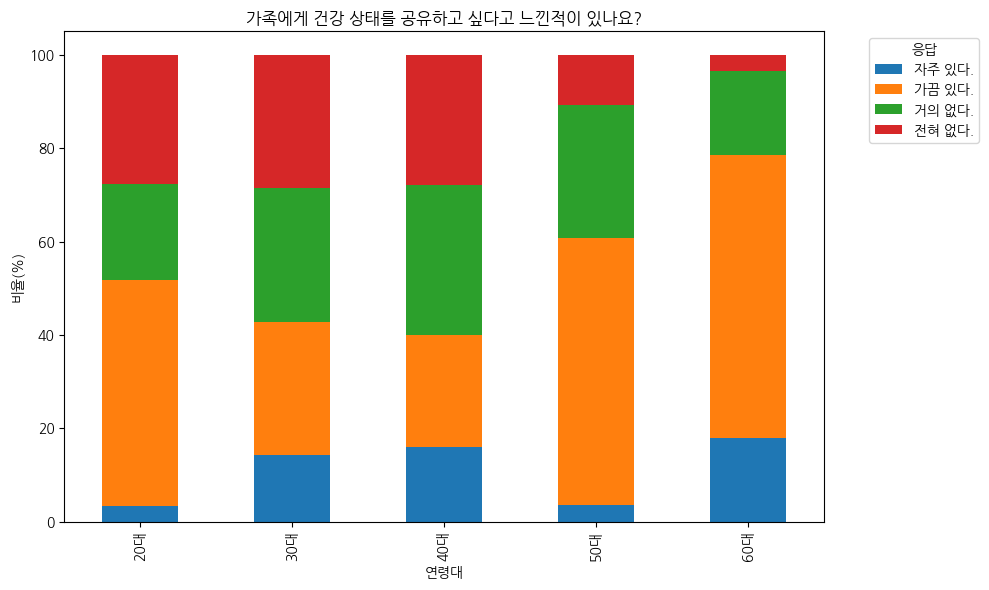

In [11]:
# 시각화
ct_q11_pct.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('가족에게 건강 상태를 공유하고 싶다고 느낀적이 있나요?')
plt.ylabel('비율(%)')
plt.xlabel('연령대')
plt.legend(title='응답', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()